In [69]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [70]:
df = pd.read_csv("dataset.csv", header= 0)
df = df.set_index("Index")
df.head()

,Height(Inches),Weight(Pounds)
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


In [71]:
df = df.rename(columns={"Height(Inches)": "Altura en centímetros"})
df = df.rename(columns={"Weight(Pounds)": "Peso en kilos"})

In [72]:
def cambiar_altura(altura):
    return altura + 100

def cambiar_peso(peso):
    return peso * 0.453592

In [73]:
df["Altura en centímetros"] = df["Altura en centímetros"].apply(lambda x: round(cambiar_altura(x),1))
df["Peso en kilos"] = df["Peso en kilos"].apply(lambda x : round(cambiar_peso(x),1))
df.head()

,Altura en centímetros,Peso en kilos
Index,,
1,165.8,51.3
2,171.5,61.9
3,169.4,69.4
4,168.2,64.6
5,167.8,65.5


In [74]:
porcentaje_a_mantener = 0.05
filas_a_mantener = int(len(df) * porcentaje_a_mantener)
filas_mantener = df.sample(n=filas_a_mantener, random_state=42)
df = filas_mantener

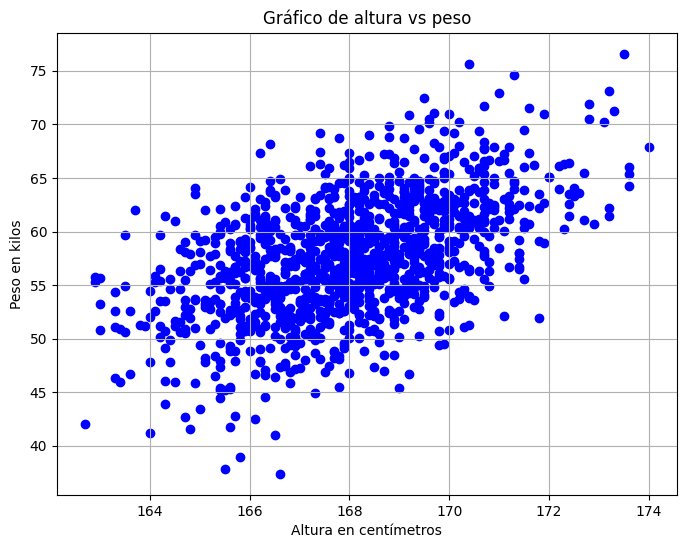

In [75]:
altura = df["Altura en centímetros"]
peso = df["Peso en kilos"]

plt.figure(figsize=(8, 6))
plt.scatter(altura, peso, color='blue')
plt.title('Gráfico de altura vs peso')
plt.xlabel('Altura en centímetros')
plt.ylabel('Peso en kilos')
plt.grid(True)
plt.show()

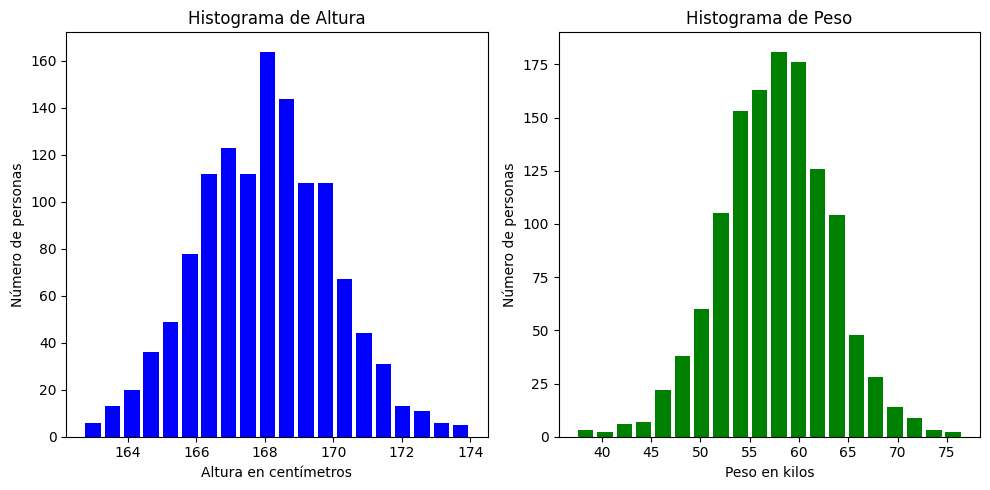

In [76]:
plt.figure(figsize=(10, 5))

#altura
plt.subplot(1, 2, 1)
plt.hist(altura, bins=20, rwidth=0.8, color='blue')
plt.xlabel('Altura en centímetros')
plt.ylabel('Número de personas')
plt.title('Histograma de Altura')

#peso
plt.subplot(1, 2, 2)
plt.hist(peso, bins=20, rwidth=0.8, color='green')
plt.xlabel('Peso en kilos')
plt.ylabel('Número de personas')
plt.title('Histograma de Peso')

# Mostrar gráficas
plt.tight_layout()
plt.show()

In [82]:
df = df[['Peso en kilos', 'Altura en centímetros']]
df = df.reset_index()
df = df[['Peso en kilos', 'Altura en centímetros']]
df.to_csv('dataset_preparado.csv')
print(df.head())
print(len(df))

   Peso en kilos  Altura en centímetros
0           60.9                  168.4
1           50.8                  167.9
2           61.7                  167.7
3           57.3                  169.0
4           45.4                  169.0
1250


In [78]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en características (X) y etiquetas (y)
X = df.iloc[:, 0].values.reshape(-1,1)  
y = df.iloc[:, 1]

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ahora puedes usar X_train y y_train para entrenar tu modelo, y X_test e y_test para evaluarlo

In [79]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predicciones = model.predict(X_test)

In [80]:
from sklearn.metrics import mean_absolute_error

# Calcular el MSE entre las predicciones y las etiquetas verdaderas
mae = mean_absolute_error(y_test, predicciones)

# Imprimir el MSE
print("Error medio:", mae)


Error medio: 1.3391773692504936


In [ ]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame que contiene los datos
variance = df.var()

print("Varianza de la altura:")
print(variance[0])

Varianza de la altura:
30.20082649159328


C:\Users\cesar\AppData\Local\Temp\ipykernel_18924\741591567.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(variance[0])
